In [8]:
# Initial imports
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score 

data = ('/content/model_df.csv')
model_df = pd.read_csv(data)

In [9]:
# change zip code to string and reformat
model_df['ZIP_CODE'] = model_df['ZIP_CODE'].apply(lambda x: '0' + str(x) if x < 10000 else str(x))

# merge duplicate zip code rows
#model_df = model_df.groupby(['ZIP_CODE'], as_index=False)['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST',
#                     'NETWORK_TYPE_ChargePoint',	'NETWORK_TYPE_Non-Networked',	'NETWORK_TYPE_Other-Network',
#                     'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME',
#                     'REG_COUNTS'].sum()

# set ZIP_CODE as index
model_df = model_df.set_index('ZIP_CODE')

model_df.head()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
ZIP_CODE,,,,,,,,,
03266,0,2,0,0,1,0,851.0,54904.0,0
07001,0,1,0,0,1,0,5022.0,69849.0,173
07003,0,12,5,4,1,3,18577.0,78034.0,795
07004,0,6,3,0,1,2,2621.0,122063.0,307
07005,0,1,10,0,1,1,5489.0,111946.0,445


In [10]:
model_df['EV_TOTAL'] = model_df.iloc[:, -9:-7].sum(axis=1)
model_df = model_df[['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST', 'EV_TOTAL',
                     'NETWORK_TYPE_ChargePoint',	'NETWORK_TYPE_Non-Networked',	'NETWORK_TYPE_Other-Network',
                     'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME',
                     'REG_COUNTS']]
model_df

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
ZIP_CODE,,,,,,,,,,
03266,0,2,0,2,0,1,0,851.0,54904.0,0
07001,0,1,0,1,0,1,0,5022.0,69849.0,173
07003,0,12,5,12,4,1,3,18577.0,78034.0,795
07004,0,6,3,6,0,1,2,2621.0,122063.0,307
07005,0,1,10,1,0,1,1,5489.0,111946.0,445
...,...,...,...,...,...,...,...,...,...,...
99352,0,13,3,13,1,1,4,12877.0,81410.0,3413
99354,36,48,0,84,0,45,1,9175.0,73369.0,2082
99361,0,1,0,1,0,0,1,750.0,69118.0,100


In [11]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 03266 to 99403
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EV_LEVEL_1                  2493 non-null   int64  
 1   EV_LEVEL_2                  2493 non-null   int64  
 2   EV_FAST                     2493 non-null   int64  
 3   EV_TOTAL                    2493 non-null   int64  
 4   NETWORK_TYPE_ChargePoint    2493 non-null   int64  
 5   NETWORK_TYPE_Non-Networked  2493 non-null   int64  
 6   NETWORK_TYPE_Other-Network  2493 non-null   int64  
 7   TOTAL_HOUSEHOLDS            2493 non-null   float64
 8   MEDIAN_INCOME               2493 non-null   float64
 9   REG_COUNTS                  2493 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 214.2+ KB


In [12]:
model_df.describe()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME,REG_COUNTS
count,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000
mean,0.279182,8.221019,1.715604,8.500201,2.022062,0.697152,1.468111,8606.855195,73166.091456,666.987164
std,2.064343,14.277310,3.838397,14.614100,4.819944,1.474278,2.382783,6846.422036,30414.784624,1814.401805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,10804.000000,0.000000
25%,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3047.000000,52492.000000,2.000000
50%,0.000000,4.000000,0.000000,4.000000,1.000000,0.000000,1.000000,7538.000000,65906.000000,89.000000
75%,0.000000,9.000000,1.000000,9.000000,2.000000,1.000000,2.000000,12502.000000,87311.000000,496.000000
max,48.000000,227.000000,38.000000,227.000000,85.000000,45.000000,29.000000,41355.000000,240507.000000,29672.000000


<function matplotlib.pyplot.show>

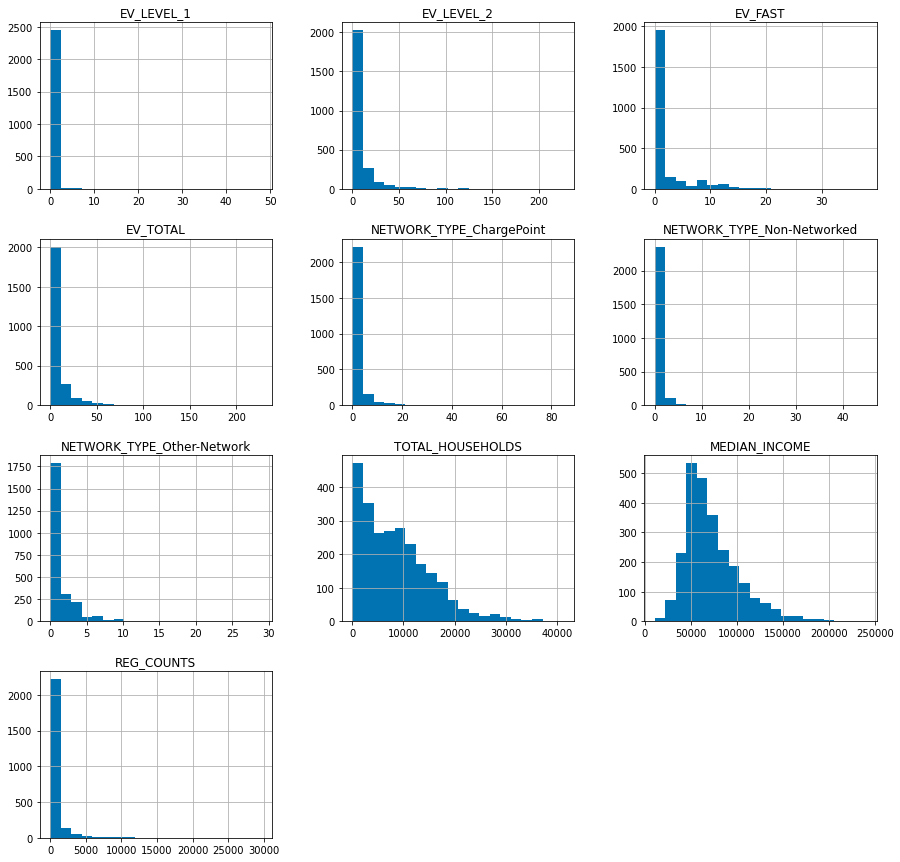

In [13]:
model_df.hist(bins=20, figsize=(15,15))
plt.show

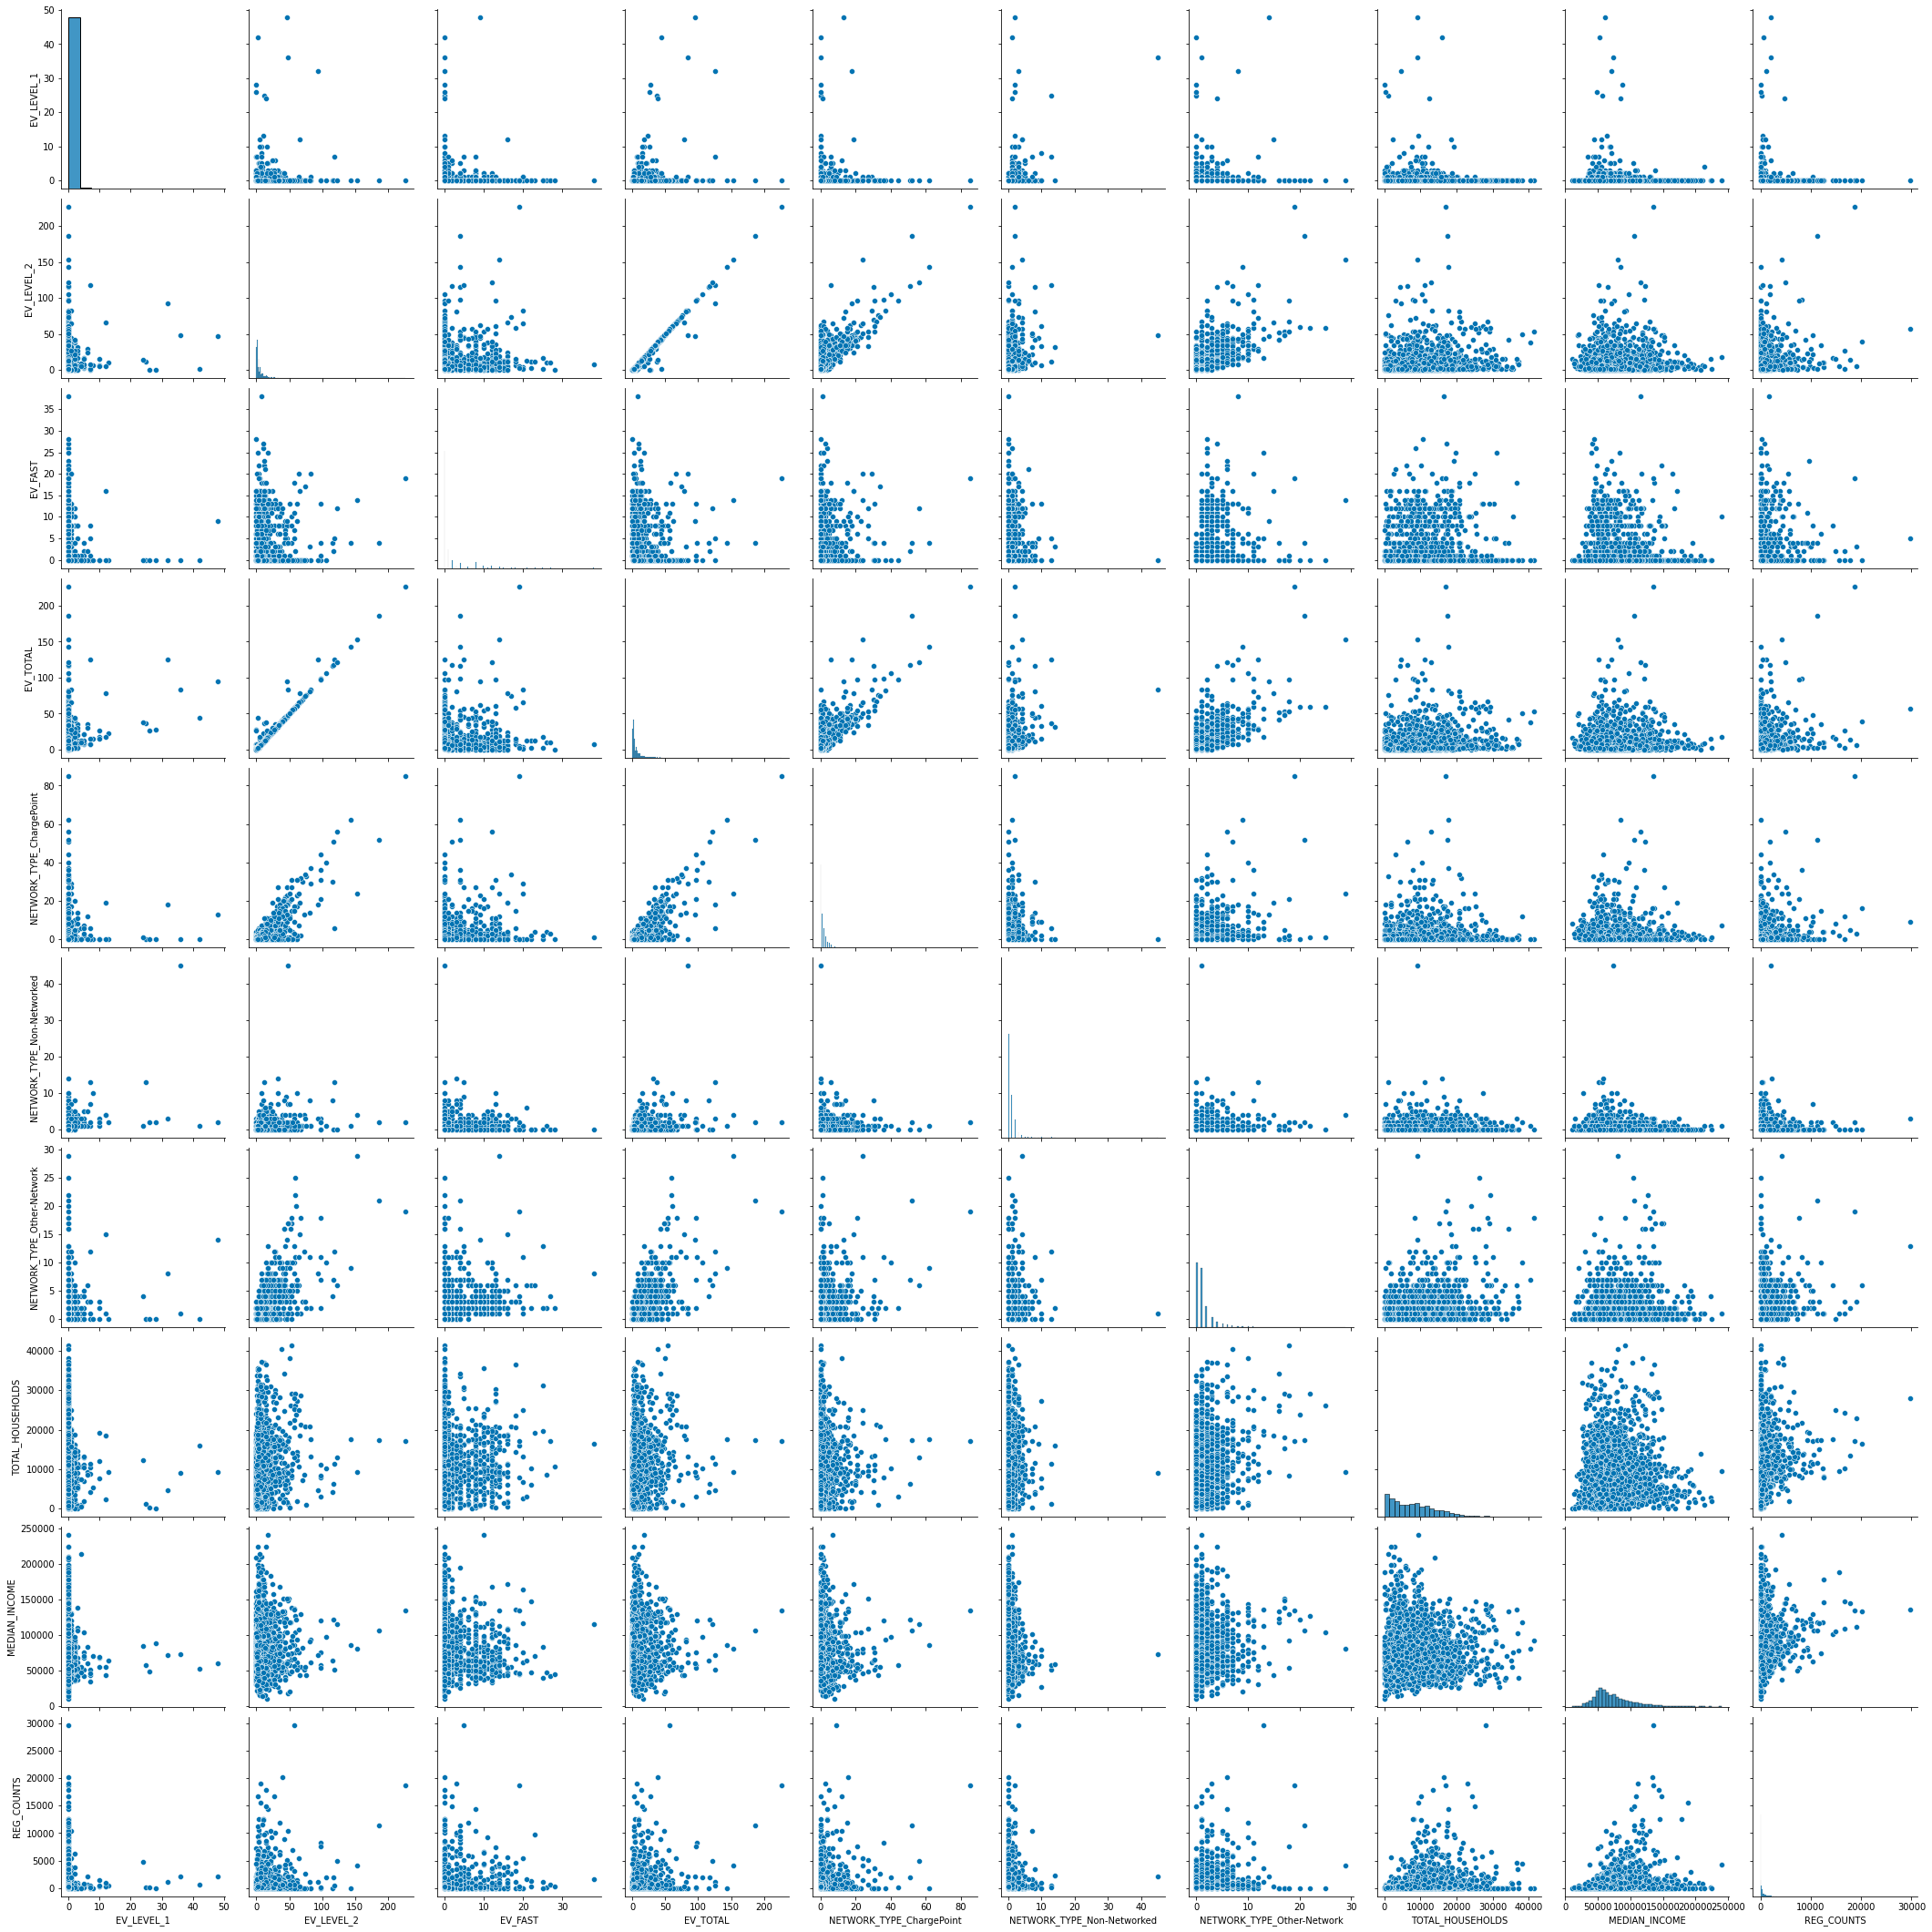

In [14]:
sns.set_palette('colorblind')
sns.pairplot(data=model_df, height=3)

In [15]:
corr_matrix = model_df.corr()
corr_matrix['REG_COUNTS'].sort_values(ascending=False)

REG_COUNTS                    1.000000
NETWORK_TYPE_Other-Network    0.275864
TOTAL_HOUSEHOLDS              0.275418
MEDIAN_INCOME                 0.275283
EV_LEVEL_2                    0.271770
EV_TOTAL                      0.266710
NETWORK_TYPE_ChargePoint      0.248188
EV_FAST                       0.122623
NETWORK_TYPE_Non-Networked    0.040663
EV_LEVEL_1                    0.008519
Name: REG_COUNTS, dtype: float64

<function scatter_matrix at 0x7f8d8dc5c200>


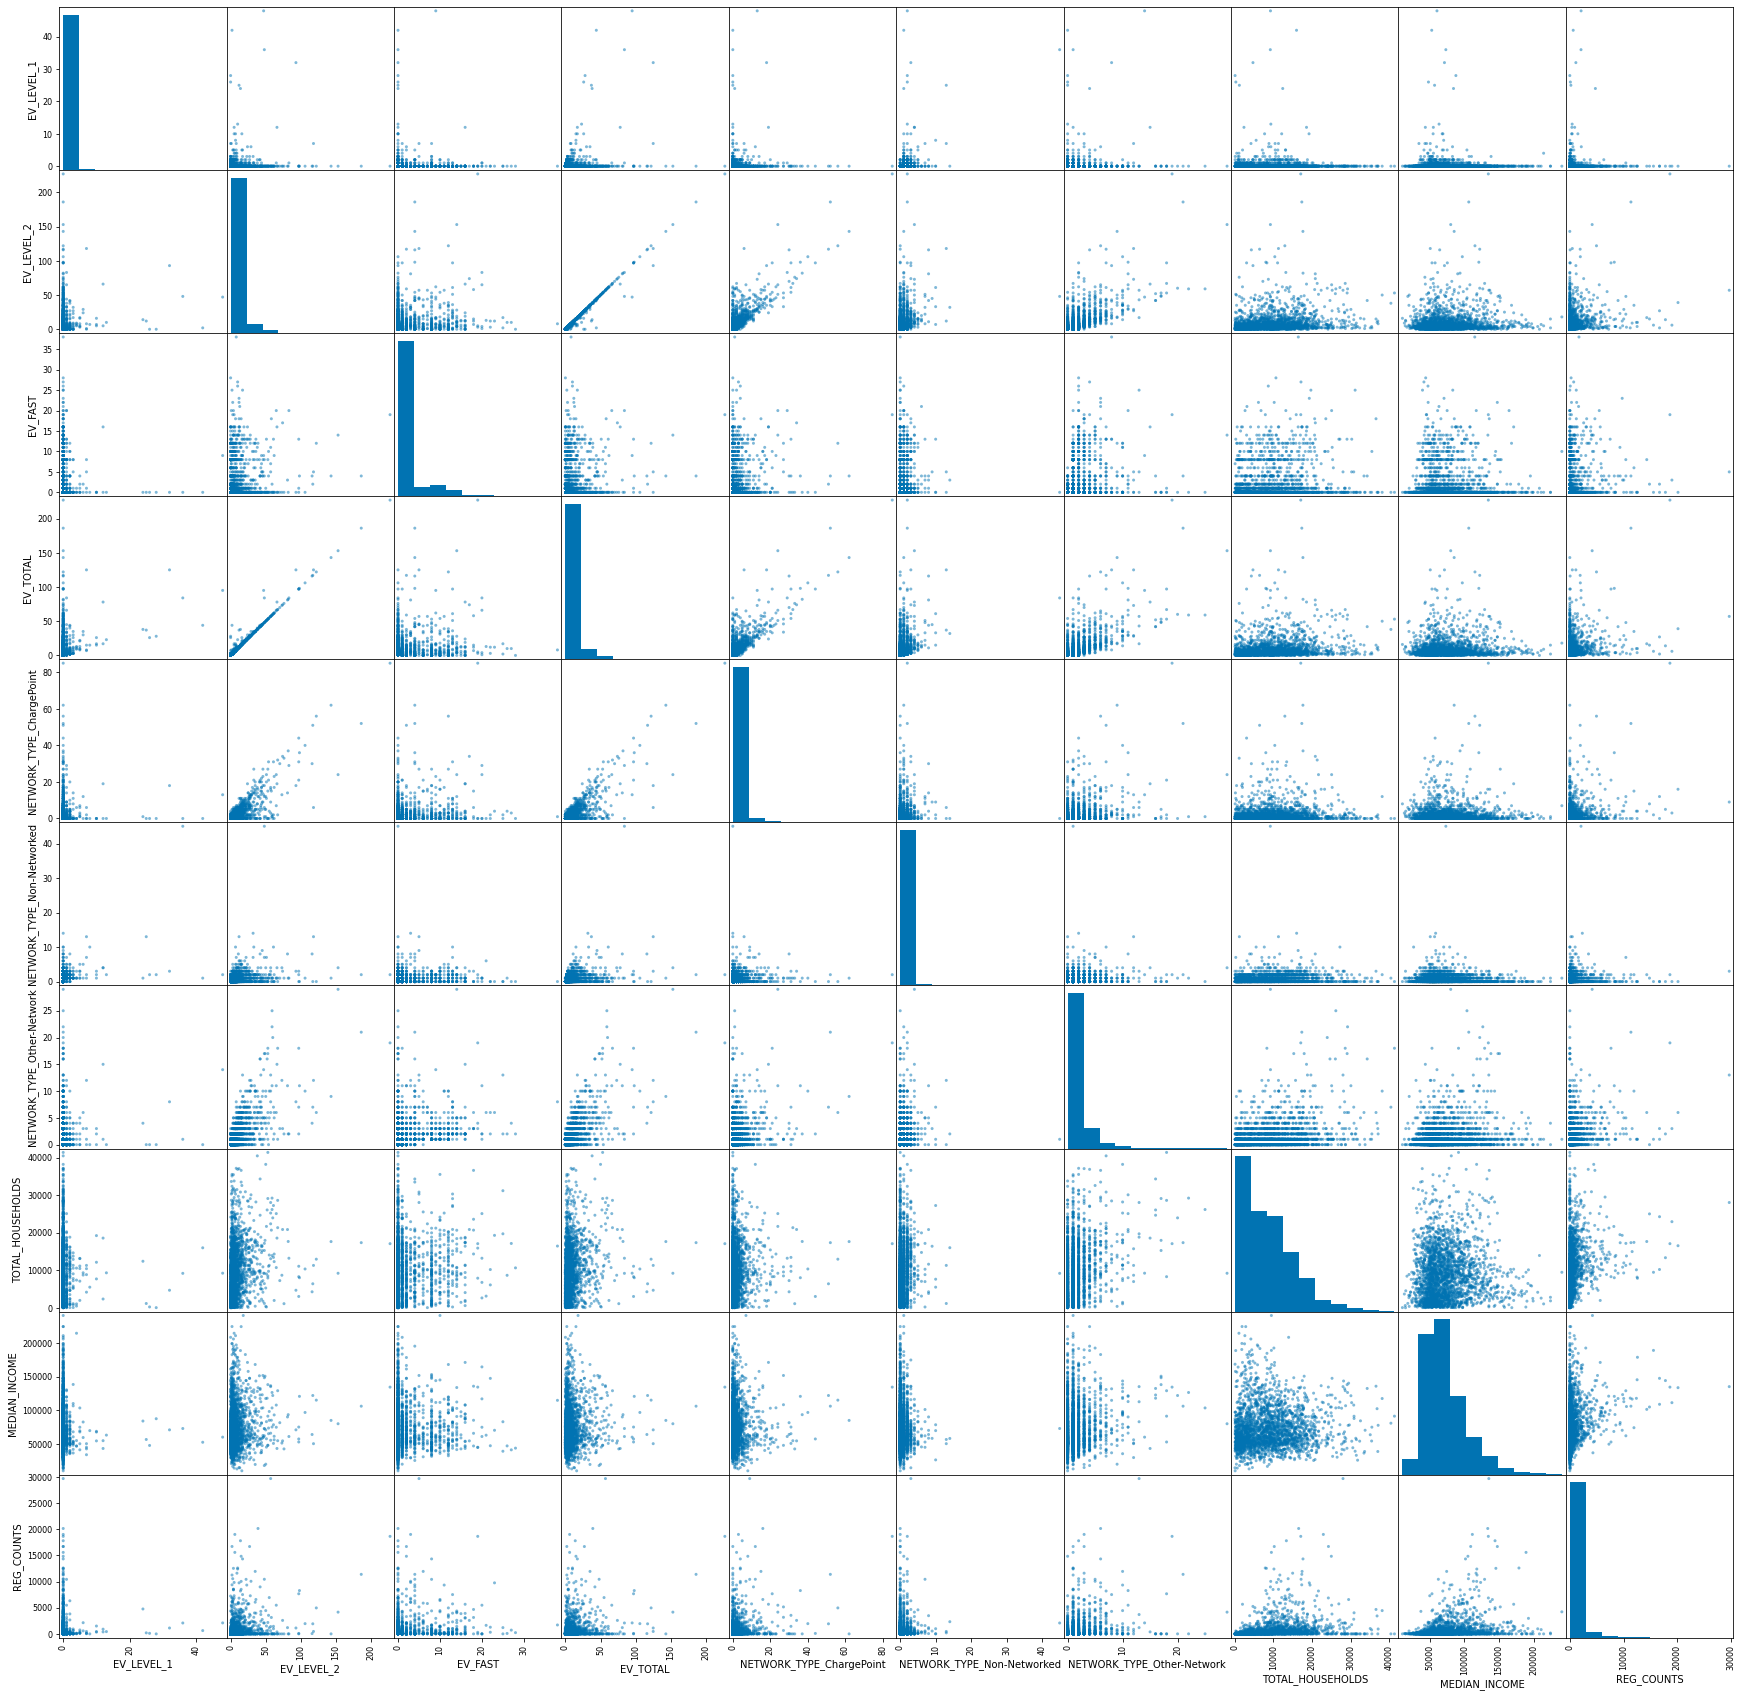

In [16]:
from pandas.plotting import scatter_matrix

attributes = ['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST', 'EV_TOTAL',
              'NETWORK_TYPE_ChargePoint', 'NETWORK_TYPE_Non-Networked', 'NETWORK_TYPE_Other-Network',
              'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME',
              'REG_COUNTS']

#attributes = ['EV_TOTAL',
#              'NETWORK_TYPE_Other-Network',
#              'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME',
#              'REG_COUNTS']

scatter_matrix(model_df[attributes], figsize=(30, 30))
print(scatter_matrix)

# Scaling & Normalization

In [17]:
y = model_df.REG_COUNTS
y.shape

(2493,)

In [18]:
X = model_df.drop(['REG_COUNTS'], axis=1)
X.shape

(2493, 9)

In [19]:
scaler = StandardScaler()

In [20]:
scaled_data = scaler.fit_transform(X)

In [21]:
scaled_df = pd.DataFrame(scaled_data, index=X.index, columns=X.columns)
scaled_df.head()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME
ZIP_CODE,,,,,,,,,
03266,-0.135267,-0.435815,-0.447048,-0.444879,-0.419604,0.205462,-0.616256,-1.133061,-0.600555
07001,-0.135267,-0.505870,-0.447048,-0.513320,-0.419604,0.205462,-0.616256,-0.523715,-0.109084
07003,-0.135267,0.264737,0.855840,0.239529,0.410448,0.205462,0.643028,1.456548,0.160083
07004,-0.135267,-0.155594,0.334685,-0.171116,-0.419604,0.205462,0.223267,-0.874480,1.607992
07005,-0.135267,-0.505870,2.158729,-0.513320,-0.419604,0.205462,-0.196495,-0.455491,1.275291


In [22]:
scaled_df.describe()

,EV_LEVEL_1,EV_LEVEL_2,EV_FAST,EV_TOTAL,NETWORK_TYPE_ChargePoint,NETWORK_TYPE_Non-Networked,NETWORK_TYPE_Other-Network,TOTAL_HOUSEHOLDS,MEDIAN_INCOME
count,2.493000e+03,2.493000e+03,2.493000e+03,2.493000e+03,2.493000e+03,2.493000e+03,2.493000e+03,2.493000e+03,2.493000e+03
mean,1.768786e-15,-1.410914e-15,-7.700307e-16,-1.491876e-18,2.127371e-16,1.554067e-15,3.273143e-15,-3.540422e-18,-7.548448e-17
std,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00,1.000201e+00
min,-1.352671e-01,-5.759256e-01,-4.470480e-01,-5.817605e-01,-4.196040e-01,-4.729718e-01,-6.162564e-01,-1.253732e+00,-2.050799e+00
25%,-1.352671e-01,-4.358151e-01,-4.470480e-01,-4.448789e-01,-4.196040e-01,-4.729718e-01,-6.162564e-01,-8.122448e-01,-6.798746e-01
50%,-1.352671e-01,-2.957046e-01,-4.470480e-01,-3.079973e-01,-2.120910e-01,-4.729718e-01,-1.964949e-01,-1.561501e-01,-2.387506e-01
75%,-1.352671e-01,5.457172e-02,-1.864704e-01,3.420667e-02,-4.578103e-03,2.054624e-01,2.232667e-01,5.690456e-01,4.651602e-01
max,2.312135e+01,1.532662e+01,9.454904e+00,1.495430e+01,1.721900e+01,3.005657e+01,1.155683e+01,4.784209e+00,5.503063e+00


# Linear Regression

In [23]:
X_scaled = scaled_df.EV_TOTAL.values.reshape(-1,1)

In [24]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [25]:
# Train the model using the training sets
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Make predictions using the testing set
y_pred = lin_model.predict(X_test)
print(y_pred.shape)

(823,)


In [27]:
X_test

array([[-0.58176047],
       [-0.17111571],
       [-0.37643809],
       [-0.17111571],
       [-0.58176047],
       [-0.3079973 ],
       [-0.51331968],
       [-0.3079973 ],
       [-0.3079973 ],
       [-0.44487888],
       [-0.58176047],
       [-0.44487888],
       [-0.44487888],
       [-0.44487888],
       [-0.51331968],
       [-0.03423412],
       [-0.17111571],
       [-0.10267492],
       [ 0.10264746],
       [-0.3079973 ],
       [-0.37643809],
       [-0.44487888],
       [-0.51331968],
       [ 0.10264746],
       [ 0.37641064],
       [-0.44487888],
       [-0.37643809],
       [-0.44487888],
       [-0.51331968],
       [-0.44487888],
       [-0.44487888],
       [-0.17111571],
       [-0.3079973 ],
       [-0.51331968],
       [-0.03423412],
       [-0.44487888],
       [-0.3079973 ],
       [ 0.30796984],
       [-0.58176047],
       [-0.44487888],
       [ 0.99237777],
       [-0.44487888],
       [-0.17111571],
       [-0.3079973 ],
       [-0.17111571],
       [-0

In [88]:
ev_test_df = pd.DataFrame([], columns=('TOTAL_EV_TEST'), index=)

#ev_test_df['TOTAL_EV_TEST'] = []

#for test in X_test:
#  ev_test_df['TOTAL_EV_TEST'] = ev_test_df.append([test[0]])

TypeError: ignored

In [86]:
ev_test_df

""


In [69]:
y_pred

array([ 362.02148594,  552.32803444,  552.32803444,  552.32803444,
        362.02148594,  488.89251828,  393.73924402,  488.89251828,
        488.89251828,  488.89251828,  362.02148594,  425.45700211,
        425.45700211,  425.45700211,  393.73924402,  615.76355061,
        742.63458295,  584.04579253,  679.19906678,  488.89251828,
        457.17476019,  425.45700211,  393.73924402,  679.19906678,
        806.07009912,  425.45700211,  457.17476019,  425.45700211,
        393.73924402,  425.45700211,  425.45700211,  552.32803444,
        488.89251828,  393.73924402,  615.76355061,  425.45700211,
        488.89251828,  774.35234103,  362.02148594,  425.45700211,
       1091.52992187,  425.45700211,  552.32803444,  488.89251828,
        552.32803444,  457.17476019,  742.63458295,  679.19906678,
        647.4813087 ,  425.45700211,  837.7878572 ,  425.45700211,
        457.17476019,  393.73924402,  552.32803444, 2328.52248715,
        679.19906678, 1281.83647038,  488.89251828,  615.76355

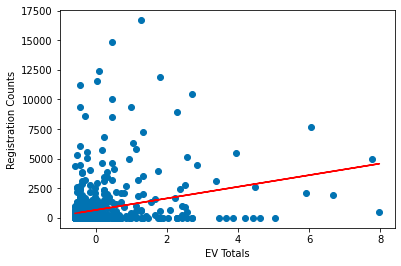

In [28]:
plt.scatter(X_test, y_test)
plt.xlabel('EV Totals')
plt.ylabel('Registration Counts')
plt.plot(X_test, y_pred, color='red')
plt.show()

In [29]:
# The coefficients
print("Coefficients: \n", lin_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [490.09708321]
Mean squared error: 2721419.97
Coefficient of determination: 0.07


# Linear Regression - SCALED

In [ ]:
# Train the model using the training sets
lin_model_scaled = LinearRegression()
lin_model_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make predictions using the testing set
y_pred2 = lin_model.predict(X_test_scaled)
print(y_pred2.shape)

(908,)


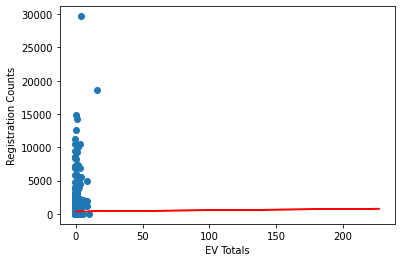

In [ ]:
plt.scatter(X_test_scaled, y_test)
plt.xlabel('EV Totals')
plt.ylabel('Registration Counts')
plt.plot(X_test, y_pred2, color='red')
plt.show()

In [ ]:
# The coefficients
print("Coefficients: \n", lin_model_scaled.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred2))

Coefficients: 
 [336.96833119]
Mean squared error: 3718497.62
Coefficient of determination: -0.01


# Multivariable Linear Regression

In [ ]:
# multi_X = model_df[['EV_LEVEL_1', 'EV_LEVEL_2', 'EV_FAST', 'EV_TOTAL',
#                     'NETWORK_TYPE_ChargePoint',	'NETWORK_TYPE_Non-Networked',	'NETWORK_TYPE_Other-Network',
#                     'TOTAL_HOUSEHOLDS',	'MEDIAN_INCOME']]

multi_X = model_df[['EV_LEVEL_2', 'EV_FAST']]

multi_X.shape

(2750, 2)

In [ ]:
# Split the data into training/testing sets
multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(multi_X, y, test_size=0.33, random_state=42)

In [ ]:
# Train the model using the training sets
multi_lin = LinearRegression()
multi_lin.fit(multi_X_train, multi_y_train)

LinearRegression()

In [ ]:
print('Intercept:', multi_lin.intercept_)
print('Coefficients:', multi_lin.coef_)

Intercept: 339.83536316948283
Coefficients: [24.62046079 29.63865301]


In [ ]:
# Make predictions using the testing set
multi_y_pred = multi_lin.predict(multi_X_test)
print(multi_y_pred.shape)

(908,)
